In [1]:
# This is test to create a mean -reversion strategy

In [47]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [79]:
ticker = '^NSEI'
download_data = yf.download(tickers=ticker)

[*********************100%%**********************]  1 of 1 completed


In [89]:
download_data
data = pd.DataFrame()
data['close'] = download_data['Adj Close']
data['return'] = data['close'].pct_change()*100
data['price_returns'] = np.log(data['close']/data['close'].shift(1))
data['cum_rtn'] = data['return'].cumsum()
data

,close,return,price_returns,cum_rtn
Date,,,,
2007-09-17,4494.649902,NaN,NaN,NaN
2007-09-18,4546.200195,1.146926,0.011404,1.146926
2007-09-19,4732.350098,4.094626,0.040130,5.241552
2007-09-20,4747.549805,0.321187,0.003207,5.562739
2007-09-21,4837.549805,1.895715,0.018780,7.458454
...,...,...,...,...
2024-12-20,23587.500000,-1.520557,-0.015322,203.324744
2024-12-23,23753.449219,0.703547,0.007011,204.028291
2024-12-24,23727.650391,-0.108611,-0.001087,203.919680


<Axes: xlabel='Date'>

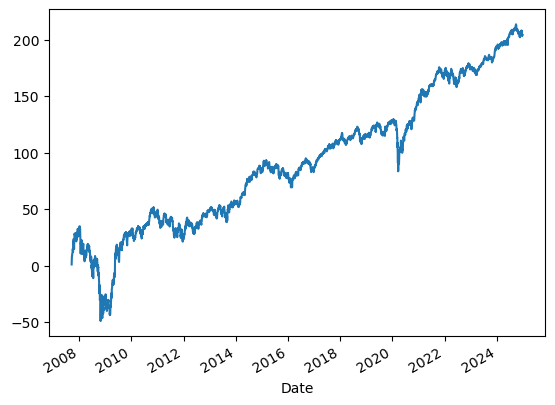

In [82]:
data['cum_rtn'].plot()

In [83]:
# Calculate Linear Regression
def create_LR(df):
    y = np.array(data['close'])
    X = pd.to_datetime(data['close'].index).map(dt.datetime.toordinal)
    X = np.array(X)
    intercept, slope = np.polynomial.polynomial.polyfit(X, y, deg =1)
    plt.figure(figsize=(12,4))
    plt.plot(X,y)
    plt.plot(X,slope*X+intercept)
    plt.show()

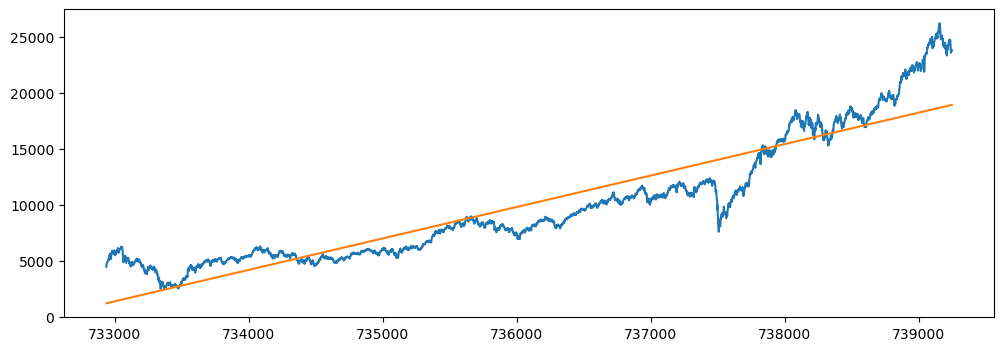

In [84]:
create_LR(data)

In [85]:
def create_LR2(df):
    y = np.array(data['close'])
    X = pd.to_datetime(data['close'].index).map(dt.datetime.toordinal)
    X = np.array(X)
    intercept, slope = np.polynomial.polynomial.polyfit(X, y, deg =1)
    regression_line = (slope * X + intercept)
    
    # Calculate standard deviation
    std_dev = np.std(y - regression_line)
    plus_2_std = regression_line + 2 * std_dev
    minus_2_std = regression_line - 2 * std_dev
    X = pd.to_datetime(data['close'].index)
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=X, y=y, label='Stock Data', alpha=0.5)
    plt.plot(X, regression_line, color='red', label='Linear Regression Line')
    plt.plot(X, plus_2_std, color='blue', linestyle='--', label='+2 Std Dev')
    plt.plot(X, minus_2_std, color='blue', linestyle='--', label='-2 Std Dev')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression and ±2 Standard Deviations')
    plt.legend()
    plt.grid(True)
    plt.show()


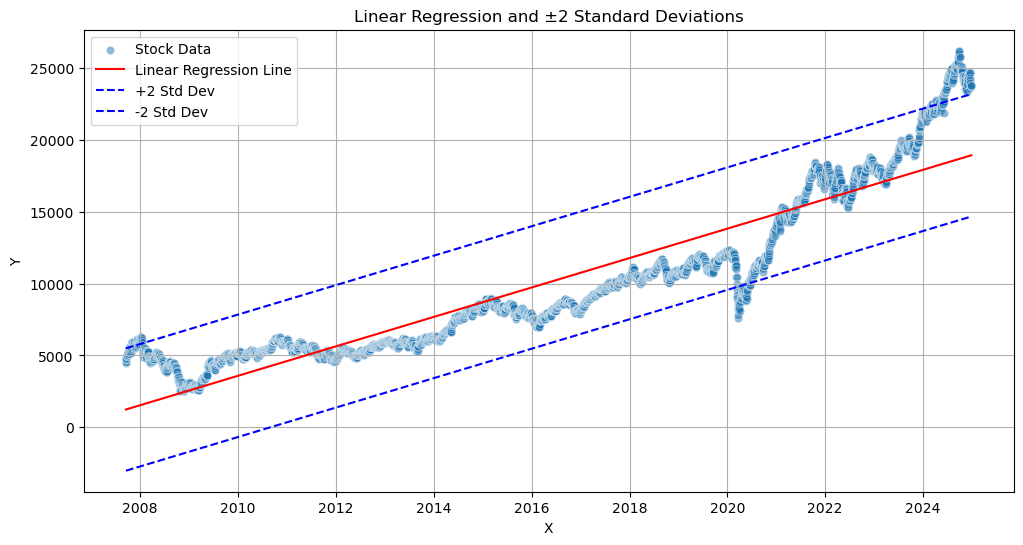

In [86]:
create_LR2(data)

In [87]:
def calculate_DD(data):
    # Calculate daily returns
    data['DailyReturn'] = data['close'].pct_change()

    # Calculate cumulative returns
    data['CumulativeReturn'] = (1 + data['DailyReturn']).cumprod()

    # Calculate the running maximum of the cumulative returns (peak value at any time)
    data['CumulativeMax'] = data['CumulativeReturn'].cummax()

    # Calculate the drawdown (percentage decline from the peak)
    data['Drawdown'] = (data['CumulativeReturn'] - data['CumulativeMax']) / data['CumulativeMax']

    # Plot the Drawdown
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Drawdown'], label='Drawdown', color='red')
    plt.fill_between(data.index, data['Drawdown'], color='red', alpha=0.3)  # Fill the area under the curve
    plt.title(f'Drawdown for {ticker} Stock (2015-2023)')
    plt.xlabel('Date')
    plt.ylabel('Drawdown (%)')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()


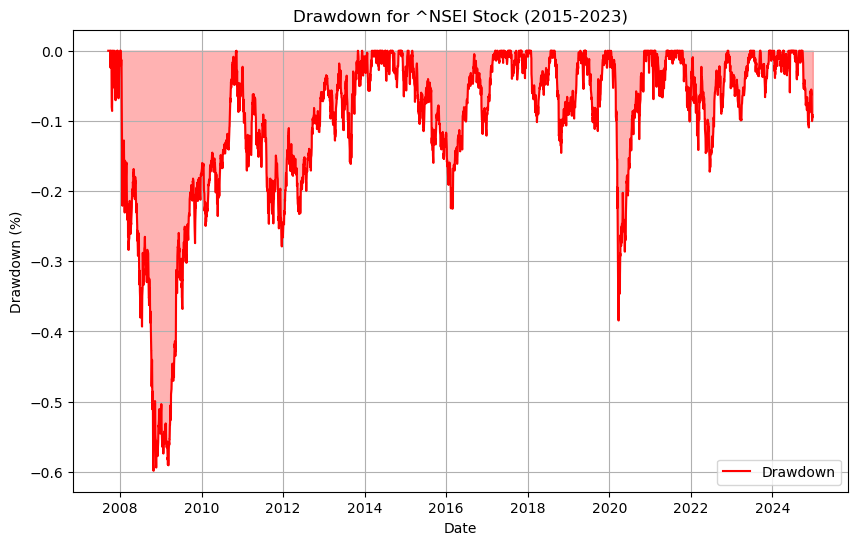

In [88]:
calculate_DD(data)

In [90]:
def calculate_DU(data):
    # Calculate daily returns
    data['DailyReturn'] = data['close'].pct_change()

    # Calculate cumulative returns
    data['CumulativeReturn'] = (1 + data['DailyReturn']).cumprod()

    # Identify the troughs and calculate the draw-up
    data['CumulativeMin'] = data['CumulativeReturn'].cummin()  # Track the minimum value of the cumulative return

    # Calculate the draw-up as the percentage increase from the trough to the current value
    data['DrawUp'] = (data['CumulativeReturn'] - data['CumulativeMin']) / data['CumulativeMin']

    # Plot the Draw-up
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['DrawUp'], label='DrawUp', color='green')
    plt.fill_between(data.index, data['DrawUp'], color='green', alpha=0.3)  # Fill the area under the curve
    plt.title(f'Draw-Up for {ticker} Stock (2015-2023)')
    plt.xlabel('Date')
    plt.ylabel('Draw-Up (%)')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()


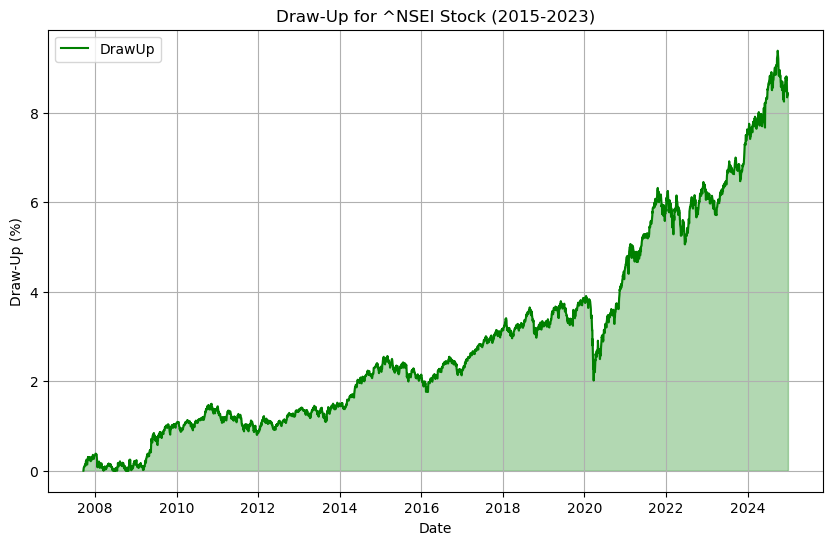

In [91]:
calculate_DU(data)